In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("max_columns", None)

reviews1 = pd.read_csv("data/reviews.csv")
listings1 = pd.read_csv("data/listings.csv")
reviews = pd.read_csv("data/reviews1.csv")
listings = pd.read_csv("data/listings1.csv")

/Users/chenjiesu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200212052319,2020-02-12,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,50%,38%,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",US,United States,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,$225.00,"$1,995.00",NaN,$350.00,$95.00,1,$0.00,7,1125,7,7,1125,1125,7.0,1125.0,3 months ago,t,30,60,90,365,2020-02-12,48,5,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20200212052319,2020-02-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,96%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"[

In [37]:
listings.shape

(51097, 106)

In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


## Sentiment Analysis

#### First we note the highly skewed distribution of reviews on the Internet: many many positives, not many negatives. This holds just as true on AirBnB as everywhere else.

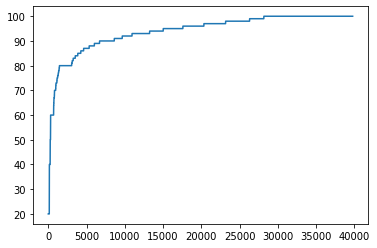

In [4]:
listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()

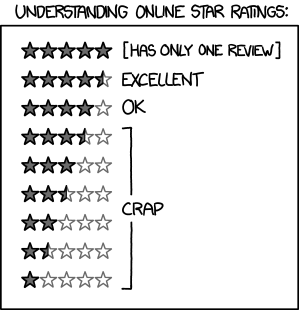

In [5]:
from IPython.display import Image
#XKCD
Image("https://imgs.xkcd.com/comics/star_ratings.png")

#### Print the first 5 reviews and the scores according to the sentiment intensity analyzer

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Notre séjour de trois nuits.
Nous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.
Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide.  A part ces petits détails notre court séjour c'est bien passé. 
Si j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à "The Midtown Castle"
Jean
Possession - Ile de La Réunion

compound: -0.3612, neg: 0.021, neu: 0.979, pos: 0.0, 
Great experience.
compound: 0.6249, neg: 0.0, neu: 0.196, pos: 0.804, 
I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like stayi

#### We can notice that the first review is not English. There are many reviews in other languages. We can filter out non English-language reviews.

In [7]:
# Snippet from:
# http://h6o6.com/2012/12/detecting-language-with-python-and-the-natural-language-toolkit-nltk/

from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
    
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [8]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [9]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

# Neutrality

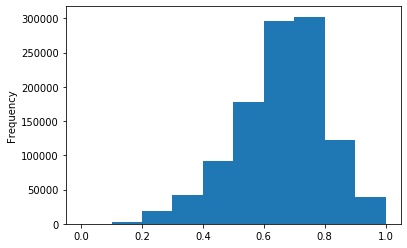

In [10]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

# Positivity

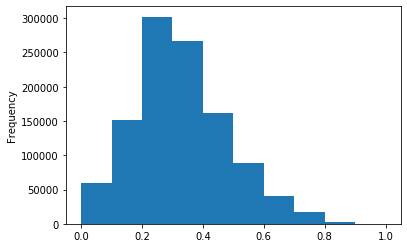

In [11]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

# Negativity

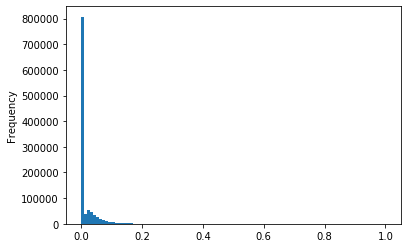

In [12]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

In [13]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [14]:
scored_reviews.head()

,review,compound,negativity,neutrality,positivity
0,I've stayed with my friend at the Midtown Cast...,0.9248,0.016,0.793,0.192
1,"We've been staying here for about 9 nights, en...",0.9229,0.000,0.808,0.192
2,We had a wonderful stay at Jennifer's charming...,0.9464,0.000,0.510,0.490
3,Hi to everyone!\r\nWould say our greatest comp...,0.9869,0.000,0.729,0.271
4,"Jennifer was very friendly and helpful, and he...",0.9668,0.000,0.546,0.454


In [15]:
scored_reviews.query('negativity > 0')

,review,compound,negativity,neutrality,positivity
0,I've stayed with my friend at the Midtown Cast...,0.9248,0.016,0.793,0.192
5,This apartment is like a real castle old and u...,0.9567,0.049,0.832,0.119
12,I love this space. It is truly a gem in the h...,0.9710,0.048,0.435,0.517
13,"This was our first Airbnb experience, and Jenn...",0.9261,0.050,0.615,0.335
15,"Jennifer was without doubt an amazing host, sh...",0.9778,0.028,0.710,0.262
...,...,...,...,...,...
1092980,Great host. No hassle at all.,0.4404,0.214,0.388,0.398
1092981,We absolutely loved Jackie’s place! She was wo...,0.9901,0.016,0.660,0.324
1092983,This spot is in a great location in the middle...,0.9258,0.080,0.620,0.300
1092994,It was a wonderful experience staying in Mike’...,0.9403,0.044,0.724,0.231


In [18]:
merged = scored_reviews.merge(scored_reviews.merge(reviews,left_index=True, right_index=True))
merged.head()

,review,compound,negativity,neutrality,positivity,listing_id,id,date,reviewer_id,reviewer_name,comments
0,I've stayed with my friend at the Midtown Cast...,0.9248,0.016,0.793,0.192,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,"We've been staying here for about 9 nights, en...",0.9229,0.000,0.808,0.192,2595,19176,2009-12-05,53267,Cate,Great experience.
2,We had a wonderful stay at Jennifer's charming...,0.9464,0.000,0.510,0.490,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,Hi to everyone!\r\nWould say our greatest comp...,0.9869,0.000,0.729,0.271,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,"Jennifer was very friendly and helpful, and he...",0.9668,0.000,0.546,0.454,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [19]:
merged[merged.columns[:6]]

,review,compound,negativity,neutrality,positivity,listing_id
0,I've stayed with my friend at the Midtown Cast...,0.9248,0.016,0.793,0.192,2595
1,"We've been staying here for about 9 nights, en...",0.9229,0.000,0.808,0.192,2595
2,We had a wonderful stay at Jennifer's charming...,0.9464,0.000,0.510,0.490,2595
3,Hi to everyone!\r\nWould say our greatest comp...,0.9869,0.000,0.729,0.271,2595
4,"Jennifer was very friendly and helpful, and he...",0.9668,0.000,0.546,0.454,2595
...,...,...,...,...,...,...
8146161,It was a wonderful experience staying in Mike’...,0.9403,0.044,0.724,0.231,28287064
8146162,"Bens apartment was clean, spacious and in an a...",0.9421,0.000,0.621,0.379,28287064
8146163,"Great experience! The location was perfect, ri...",0.9740,0.037,0.637,0.326,28287064
8146164,My friend an I really enjoyed our stay in this...,0.9725,0.000,0.591,0.409,28287064


In [21]:
table = pd.pivot_table(merged, 
                       values=['negativity', 'neutrality','positivity'], index='listing_id',aggfunc={'negativity': np.mean, 
                               'neutrality': np.mean,'positivity': np.mean})

In [22]:
table.head()

,negativity,neutrality,positivity
listing_id,,,
2595,0.017229,0.669229,0.313542
3831,0.003688,0.925263,0.071052
5099,0.002203,0.953155,0.044642
5121,0.014529,0.742765,0.242647
5178,0.019544,0.728066,0.252371


In [29]:
table.shape

(26620, 3)

In [30]:
ta = table.query('negativity > 0')
ta.shape

(21575, 3)

In [45]:
table.query('negativity > positivity').shape

(101, 3)

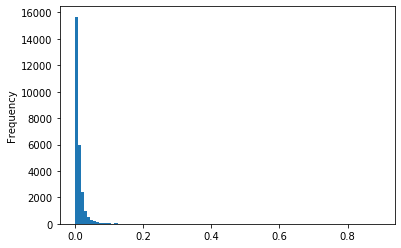

In [40]:
table['negativity'].plot(kind='hist', bins=100)

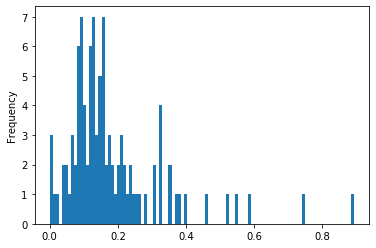

In [41]:
table.query('negativity > positivity')['negativity'].plot(kind='hist', bins=100)

In [49]:
table.query('negativity > positivity').query('negativity > 0.1').index

Int64Index([ 1665498,  2060720,  2513351,  3072242,  3435260,  3858105,
             4495434,  4698707,  4865387,  5430560,  6196265,  6644449,
             8193608,  8425657,  9013350,  9732612,  9765762,  9896731,
             9926940,  9985852, 10065831, 10083580, 10513499, 11461331,
            11545797, 11884931, 12813050, 13084346, 13238778, 15529336,
            15532430, 16504513, 17026435, 18276042, 18616809, 18873598,
            19098733, 19134330, 19174466, 19376753, 19766387, 21173263,
            21321273, 21458972, 21896267, 21994561, 22100911, 22151067,
            22344483, 22361885, 22429595, 22638243, 22730899, 22754110,
            23435615, 23839890, 25110602, 25205044, 25226807, 25453535,
            26163413, 26451520, 26501755, 26871281, 26986636, 27190713,
            27506443, 27507137, 27674973, 27678632, 28214275],
           dtype='int64', name='listing_id')

In [50]:
del_listID_NYC = table.query('negativity > positivity').query('negativity > 0.1').index

In [60]:
filtered_listings=listings[~listings.id.isin(del_listID_NYC)]
filtered_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200212052319,2020-02-12,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,50%,38%,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",US,United States,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,$225.00,"$1,995.00",NaN,$350.00,$95.00,1,$0.00,7,1125,7,7,1125,1125,7.0,1125.0,3 months ago,t,30,60,90,365,2020-02-12,48,5,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20200212052319,2020-02-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,96%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"[

In [61]:
filtered_listings.shape

(51026, 106)

In [65]:
table.query('negativity > positivity').query('negativity > 0.1').shape[0] + filtered_listings.shape[0] - listings.shape[0]

0

In [66]:
filtered_listings.to_csv("filtered_listings_NYC")